In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_path = os.path.join(os.getcwd(), 'data')
data_path

'C:\\Users\\lynkx\\Python Projects\\BB\\data'

In [3]:
df_kpis = pd.read_excel(os.path.join(data_path, 'analisi.xlsx'), sheetname='KPIs')
df_spending = pd.read_excel(os.path.join(data_path, 'analisi.xlsx'), sheetname='Spending')

In [4]:
df_kpis.sort_values(by='Date', inplace=True)
# df_kpis.head(20)

In [5]:
df_kpis.shape

(932, 12)

In [6]:
df_kpis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 932 entries, 0 to 931
Data columns (total 12 columns):
Date    932 non-null datetime64[ns]
K1      932 non-null int64
K2      932 non-null int64
K3      932 non-null int64
K4      932 non-null int64
K5      932 non-null int64
K6      932 non-null int64
K7      932 non-null int64
K8      932 non-null int64
K9      932 non-null float64
K10     932 non-null float64
K11     932 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 94.7 KB


In [7]:
df_kpis.describe()

,K1,K2,K3,K4,K5,K6,K7,K8,K9,K10,K11
count,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000
mean,11.957082,121.608369,1224.939914,1008.123391,2394.230687,2235.681330,401.503219,7398.043991,5.462774,0.374937,0.284551
std,92.494702,378.316995,516.493054,2823.077832,715.492618,1735.547803,382.924656,3998.842786,0.919098,0.115165,0.096236
min,0.000000,0.000000,155.000000,0.000000,194.000000,109.000000,83.000000,923.000000,3.030303,0.083159,0.035433
25%,0.000000,13.000000,826.750000,3.000000,1856.000000,1009.750000,235.000000,4504.000000,4.914800,0.291034,0.216624
50%,0.000000,27.000000,1234.000000,20.000000,2316.000000,1546.500000,330.000000,6224.000000,5.262321,0.404677,0.267932
75%,2.000000,56.000000,1482.500000,159.000000,2798.750000,3089.000000,448.000000,9447.500000,5.693961,0.454279,0.346154
max,2117.000000,4716.000000,3425.000000,20157.000000,5159.000000,8214.000000,6853.000000,25456.000000,9.331267,0.670593,0.678571


In [8]:
df_spending.sort_values(by='Date', inplace=True)
# df_spending.head()

In [9]:
df_spending.shape

(48, 4)

In [10]:
df_spending.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 2 to 20
Data columns (total 4 columns):
Date    48 non-null datetime64[ns]
E1      48 non-null int64
E2      48 non-null int64
E3      48 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.9 KB


In [11]:
df_spending.describe()

,E1,E2,E3
count,48.000000,48.000000,48.000000
mean,46641.375000,156225.062500,202866.437500
std,35972.240014,141070.034149,155455.458537
min,275.000000,0.000000,8490.000000
25%,16821.750000,20376.750000,63422.500000
50%,36485.500000,137202.500000,195134.000000
75%,69458.500000,264528.000000,315655.750000
max,169345.000000,683948.000000,711357.000000


In [12]:
df_kpis['month'] = df_kpis['Date'].dt.month
df_kpis['weekday'] = df_kpis['Date'].dt.weekday

### K11 time series
Check for trend and/or seasonality

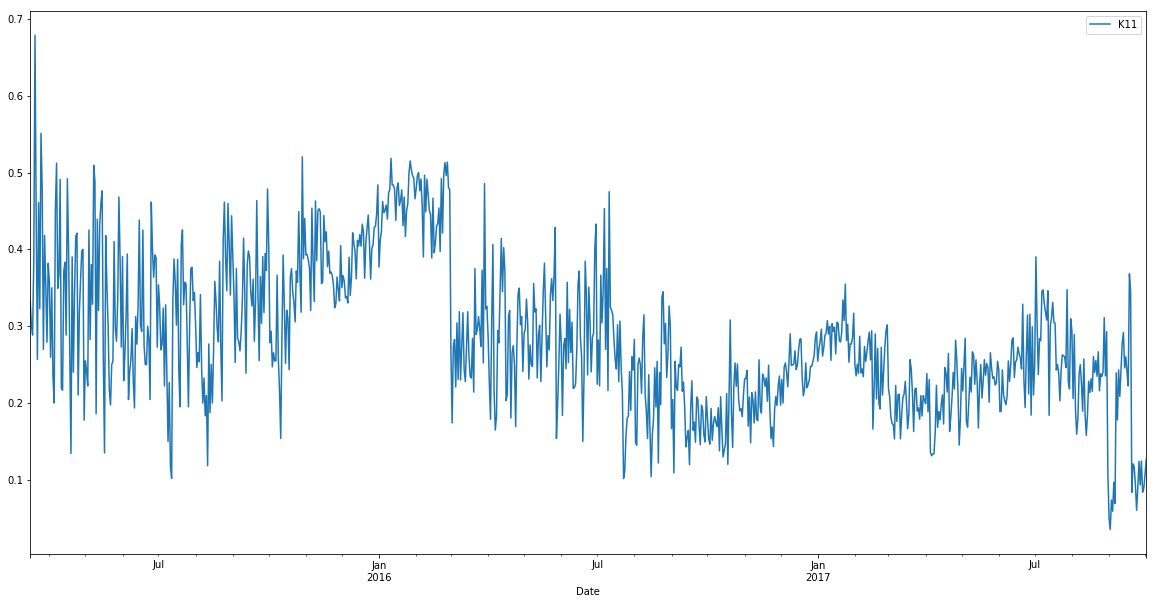

In [13]:
kvar = 'K11'
df_kpis.plot(x='Date', y=kvar, figsize=(20, 10))

From the chart it's difficult to distinguish a clear trend. There is huge drop in Mar 2016.

Let's make a stationary test

In [14]:
from statsmodels.tsa.stattools import adfuller
adfuller(df_kpis[kvar].values)

C:\Users\lynkx\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(-1.6802241130157984,
 0.44132932745078407,
 21,
 910,
 {'1%': -3.4375564198635562,
  '10%': -2.5684639415529524,
  '5%': -2.8647213198889023},
 -2599.2934167670692)

The series is not stationary (p-value: 0.441).
Let's decompose the series:

In [21]:
df = df_kpis[['Date','K11']]
df.index = df['Date']
df.drop('Date', axis=1, inplace=True)

C:\Users\lynkx\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


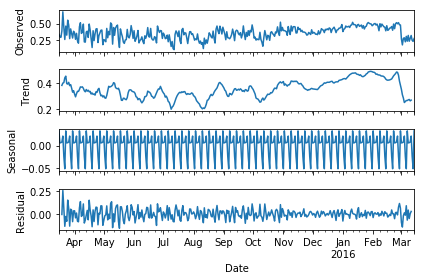

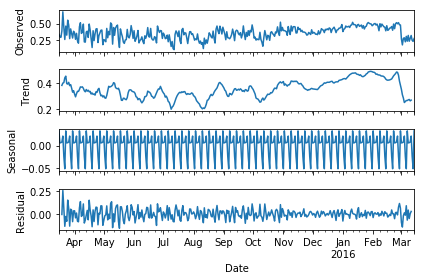

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(df[df.index < '2016-03-15'])
decomp.plot()

In [23]:
from statsmodels.graphics.tsaplots import acf, plot_acf
from statsmodels.graphics.tsaplots import pacf, plot_pacf

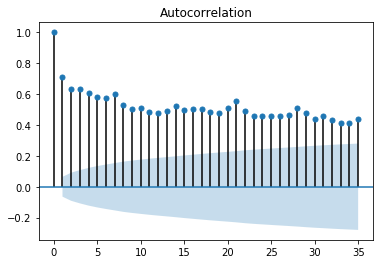

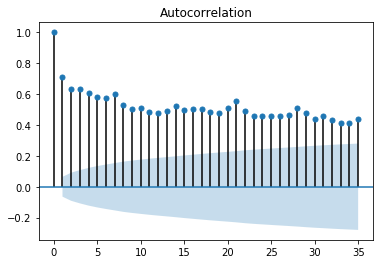

In [24]:
plot_acf(df_kpis[kvar].values, lags=35)

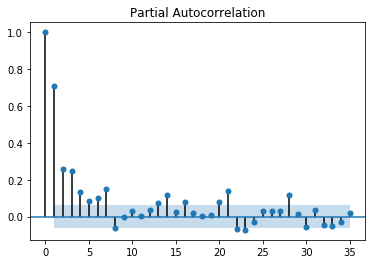

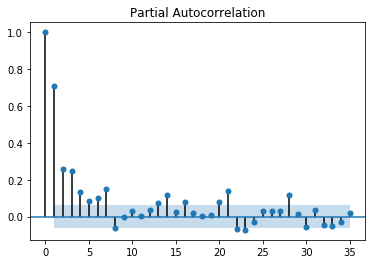

In [25]:
plot_pacf(df_kpis[kvar].values, lags=35)

There is a clear seasonality and looks like it's an autoregressive process. 
It's worth to try differentiate the data at weekly level.

In [26]:
df_diff = df[kvar] - df[kvar].shift(7)
df_diff = df_diff[df_diff.notnull()]

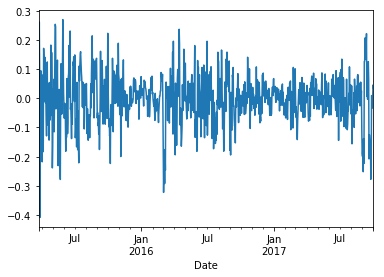

In [27]:
df_diff.plot()

In [28]:
adfuller(df_diff)

(-9.9025128747159439,
 3.3288699746466182e-17,
 20,
 904,
 {'1%': -3.4376043869287467,
  '10%': -2.5684752071912444,
  '5%': -2.8647424697167403},
 -2516.9935776068651)

Now the series is definitely stationary

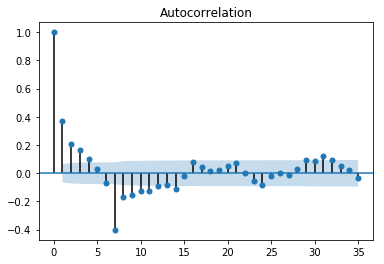

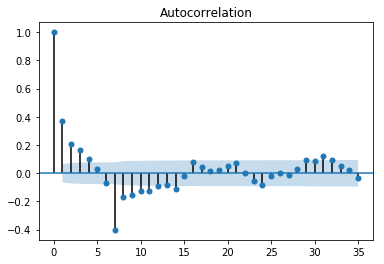

In [29]:
plot_acf(df_diff, lags=35)

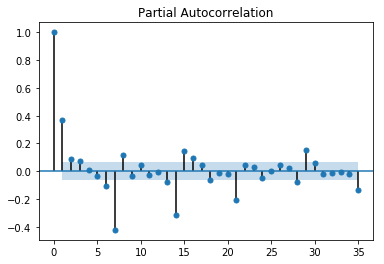

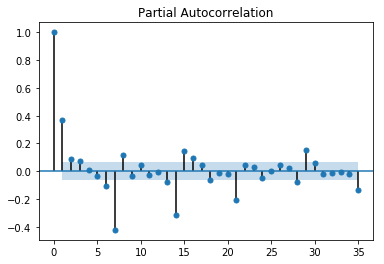

In [30]:
plot_pacf(df_diff, lags=35)

In [33]:
# acf(df_diff)

In [34]:
# for i in range(2,5): print(acf(df_diff)[1]**i)

In [104]:
# from statsmodels.stats.diagnostic import acorr_ljungbox
# ljungbox_test = acorr_ljungbox(residuals, lags=35)

Let's try a SARIMA as well, there seems to be a progressive degradation in the acf plot on the season pattern (weekly)

In [35]:
from statsmodels.tsa.statespace import sarimax
df_diff_sarma11 = sarimax.SARIMAX(df_diff, order=(1,0,0), seasonal_order=(0,0,1,0))

In [36]:
sarma11_fit = df_diff_sarma11.fit()
sarma11_fit.params

ar.L1      0.609477
ma.S.L1   -0.282384
sigma2     0.005989
dtype: float64

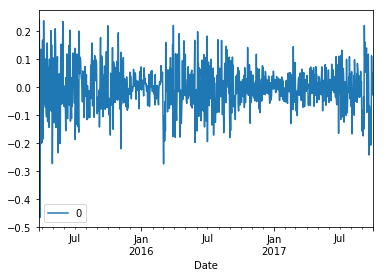

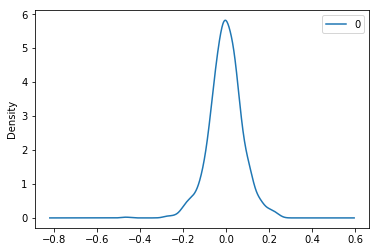

In [37]:
# plot residual errors
residualss = pd.DataFrame(sarma11_fit.resid)
residualss.plot()
residualss.plot(kind='kde')
plt.show()

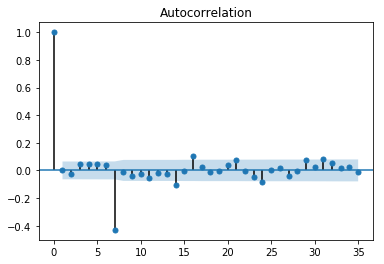

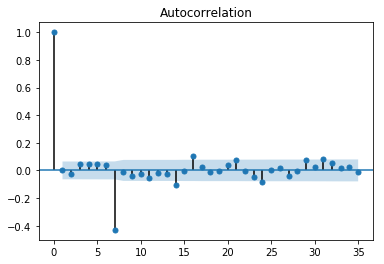

In [39]:
plot_acf(residualss, lags=35)

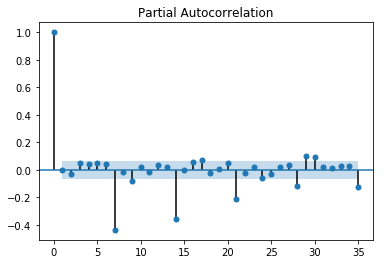

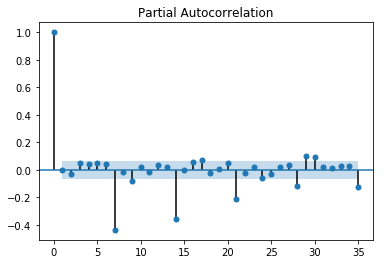

In [40]:
plot_pacf(residualss, lags=35)

ar.L1      0.609477
ma.S.L1   -0.282384
sigma2     0.005989
dtype: float64


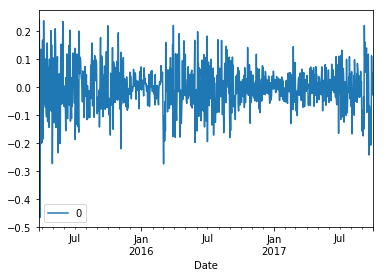

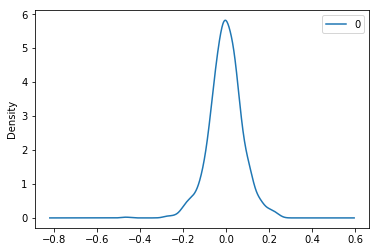

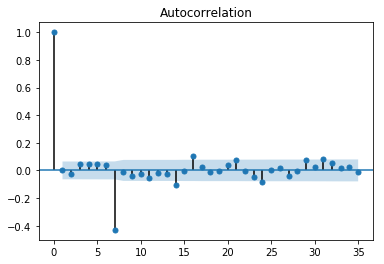

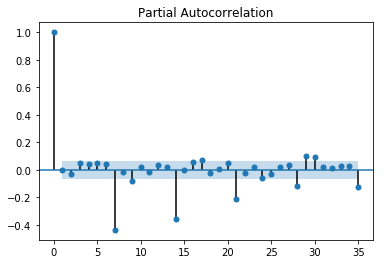

In [58]:
from statsmodels.tsa.statespace import sarimax
df_diff_sarma12 = sarimax.SARIMAX(df_diff, order=(1,0,0), seasonal_order=(0,0,1,0))
sarma12_fit = df_diff_sarma12.fit()
print(sarma12_fit.params)

# plot residual errors
residualss = pd.DataFrame(sarma12_fit.resid)
residualss.plot()
residualss.plot(kind='kde')
plot_acf(residualss, lags=35)
plot_pacf(residualss, lags=35)
plt.show()

### Extra: try with second differences

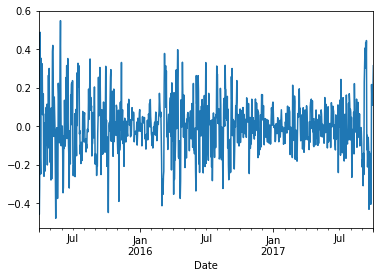

In [46]:
df_diff2 = df_diff - df_diff.shift(7)
df_diff2 = df_diff2[df_diff2.notnull()]
df_diff2.plot()

In [47]:
adfuller(df_diff2)

(-15.466663731870375,
 2.6626152100744358e-28,
 20,
 897,
 {'1%': -3.4376611618861697,
  '10%': -2.5684885413039127,
  '5%': -2.8647675027220441},
 -2078.0179422781916)

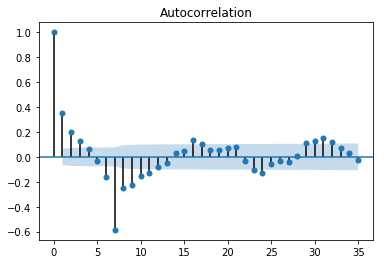

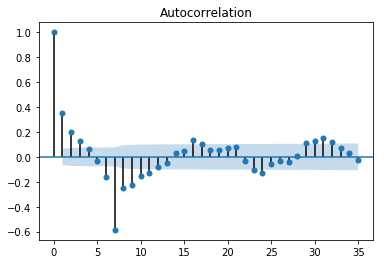

In [48]:
plot_acf(df_diff2, lags=35)

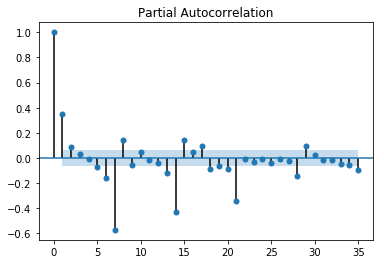

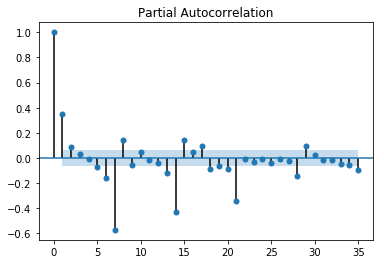

In [49]:
plot_pacf(df_diff2, lags=35)

In [50]:
# acf(df_diff2)
# for i in range(2,5): print(acf(df_diff2)[1]**i)

array([ 1.        ,  0.35242129,  0.20025997,  0.12408288,  0.06152402,
       -0.03074838, -0.15876147, -0.58624262, -0.24896706, -0.22246711,
       -0.15435663, -0.13227439, -0.08468329, -0.04681372,  0.03200111,
        0.04841276,  0.13531578,  0.10097659,  0.05871908,  0.0552767 ,
        0.07304158,  0.07583267, -0.03126426, -0.10230823, -0.12732162,
       -0.05666231, -0.02997861, -0.03868613,  0.00878618,  0.10980585,
        0.12858431,  0.15530562,  0.1225016 ,  0.07049189,  0.0305781 ,
       -0.02384836, -0.09535788, -0.1258097 , -0.11311015, -0.13871835,
       -0.09671572])

ar.L1      0.564510
ma.S.L1   -0.239373
sigma2     0.016855
dtype: float64


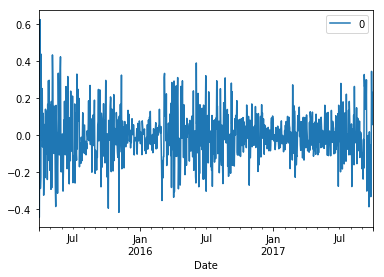

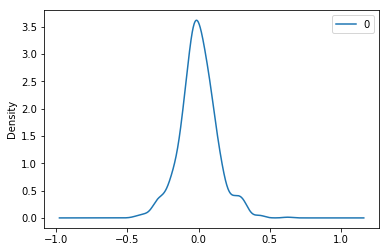

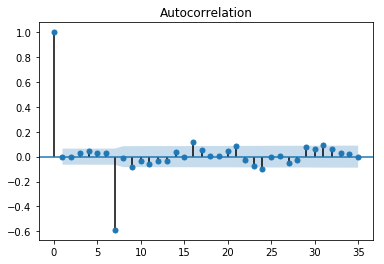

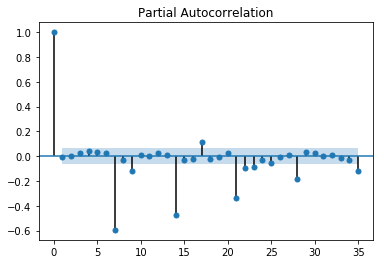

In [57]:
from statsmodels.tsa.statespace import sarimax
df_diff2_sarma12 = sarimax.SARIMAX(df_diff2, order=(1,0,0), seasonal_order=(0,0,1,0))
sarma12_fit = df_diff2_sarma12.fit()
print(sarma12_fit.params)

# plot residual errors
residualss = pd.DataFrame(sarma12_fit.resid)
residualss.plot()
residualss.plot(kind='kde')
plot_acf(residualss, lags=35)
plot_pacf(residualss, lags=35)
plt.show()

## Old analysis

In [14]:
Kcol = []
for i in range(11):
    Kcol.append('K' + str(i+1))

df_kpis_log = np.log1p(df_kpis[Kcol])

In [15]:
df_kpis_log = pd.concat([df_kpis[['Date', 'year', 'month', 'weekday']], df_kpis_log], axis=1)

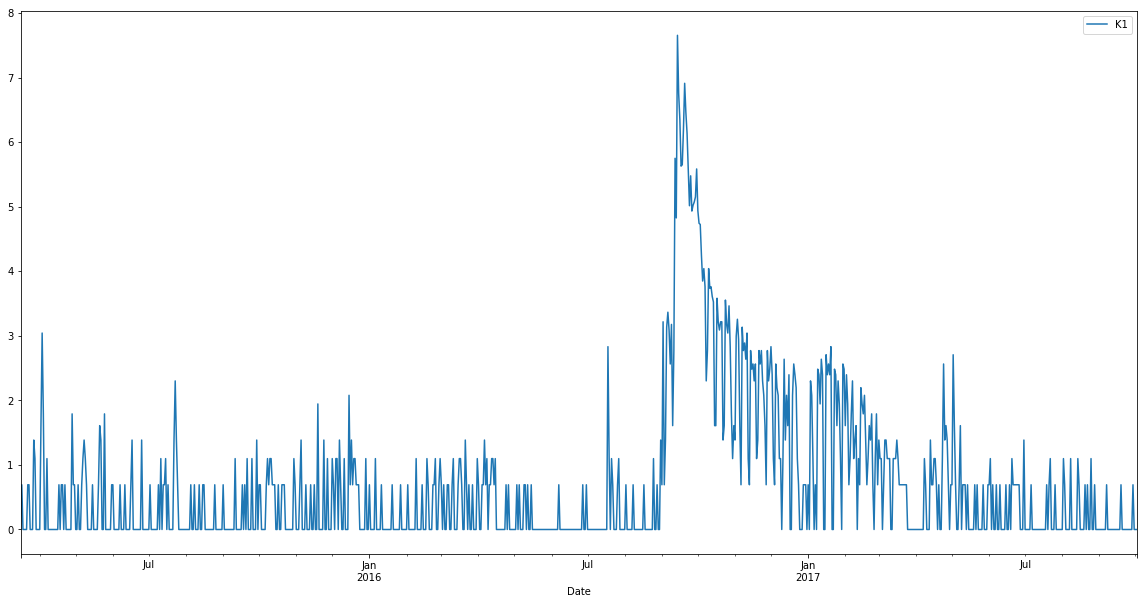

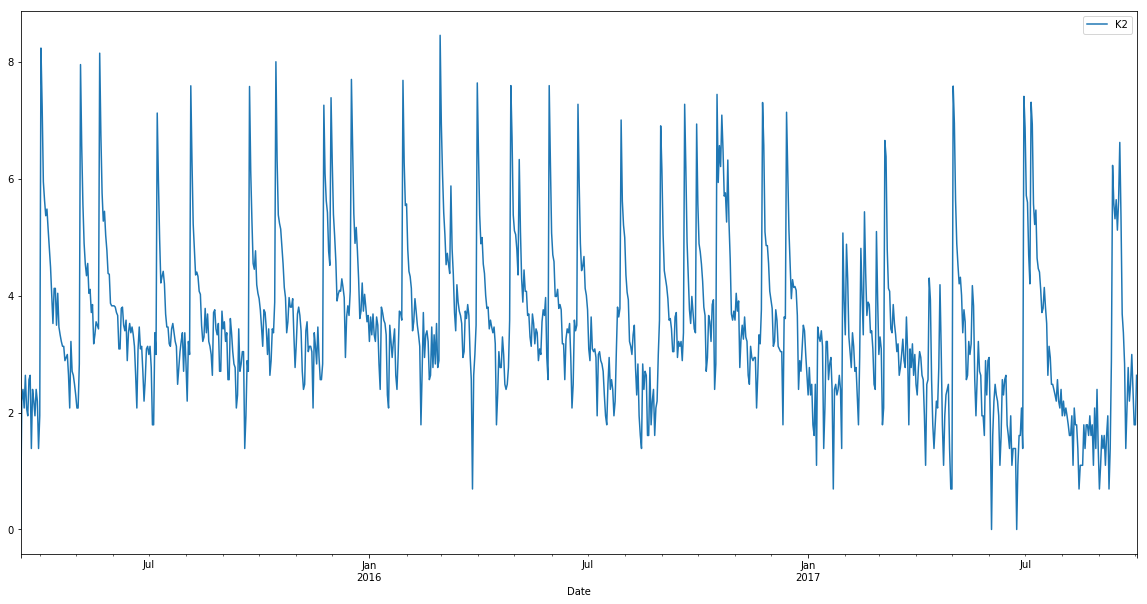

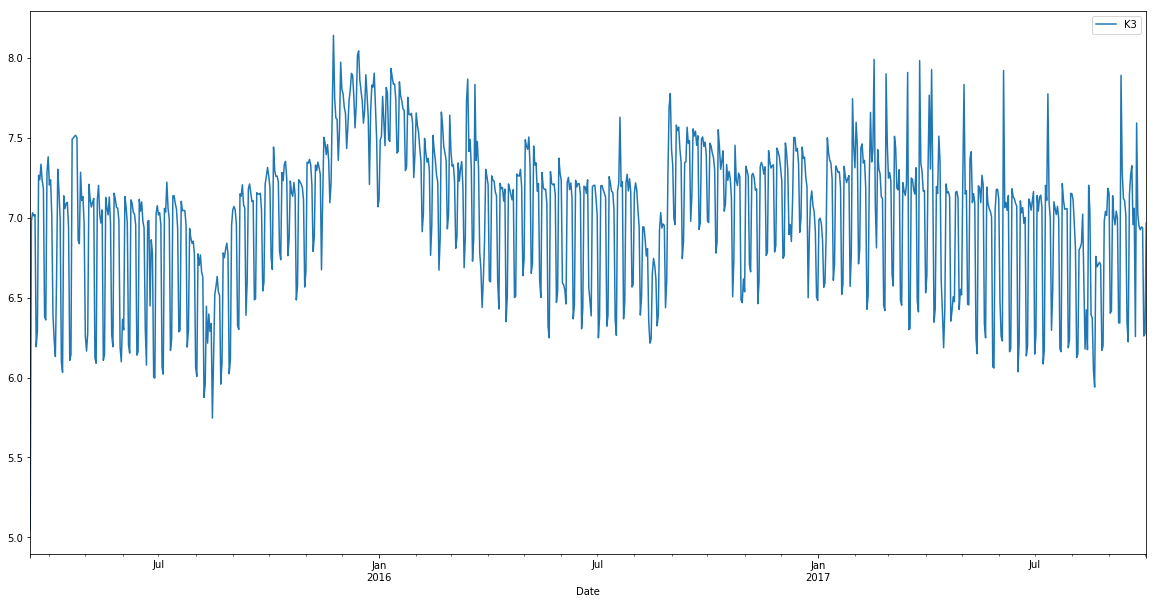

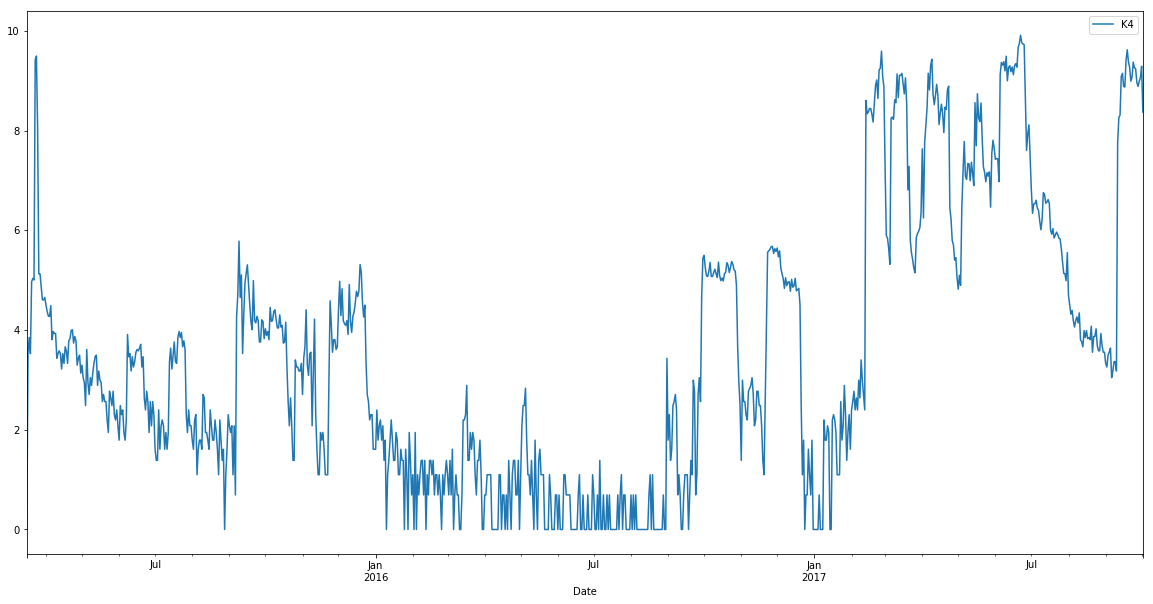

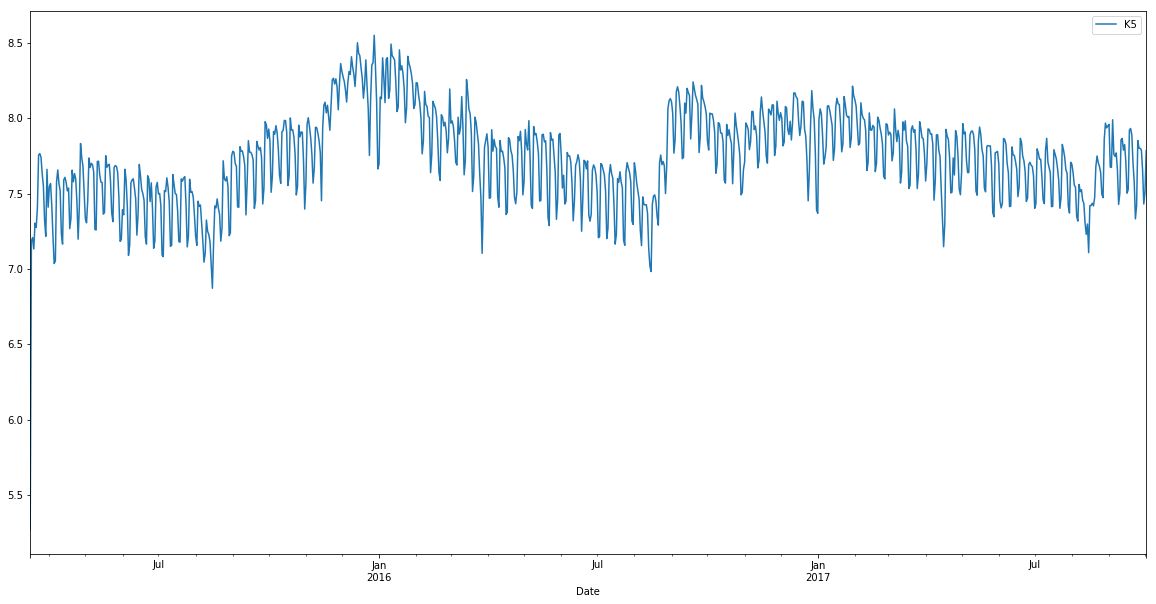

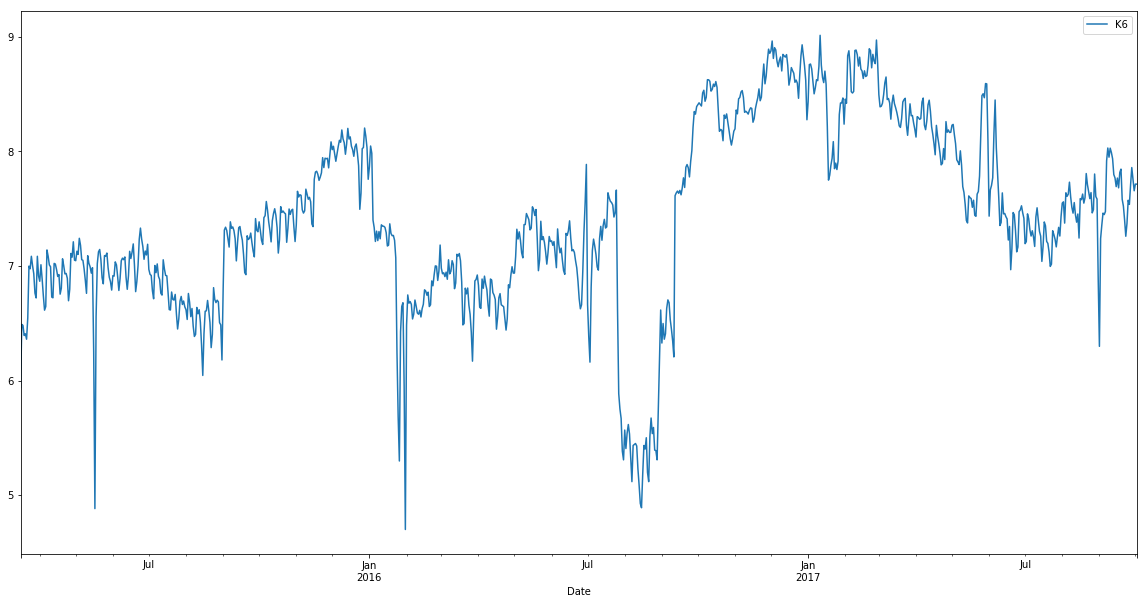

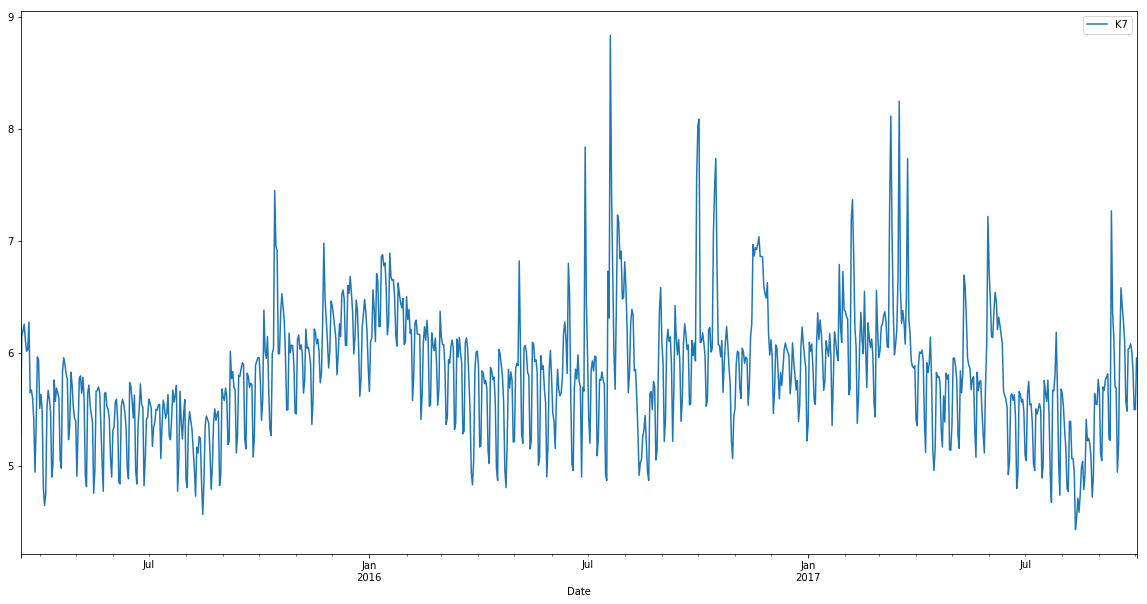

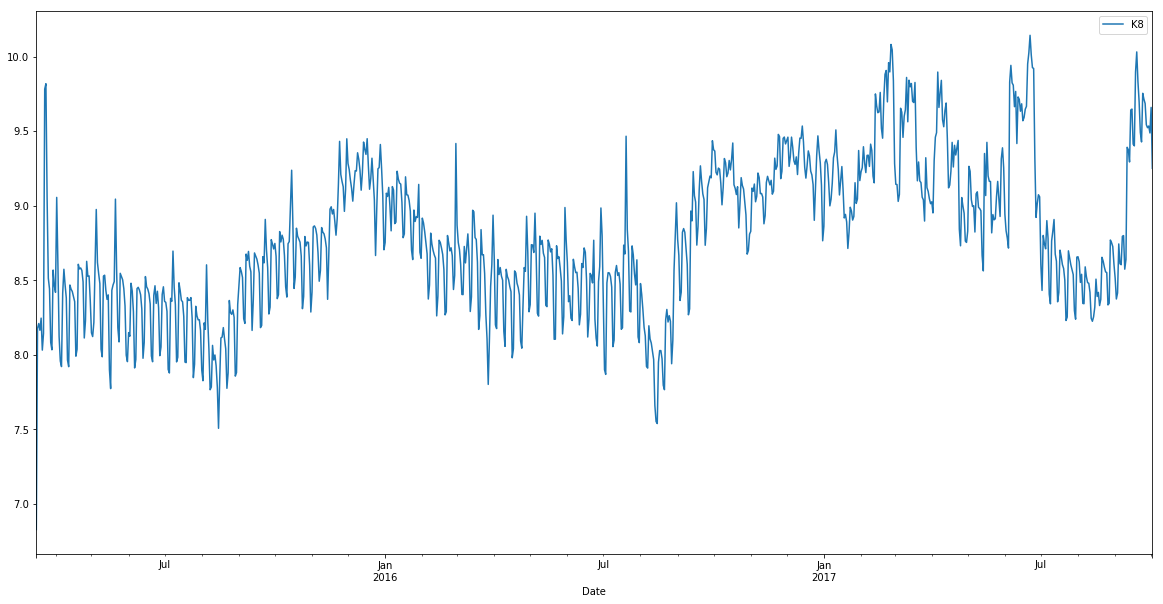

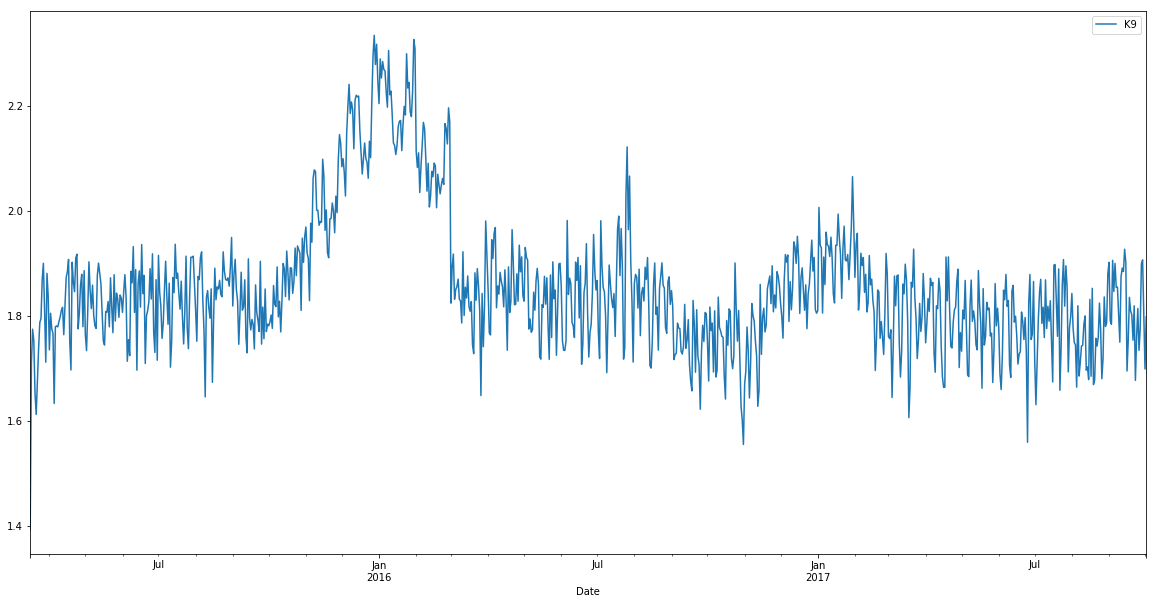

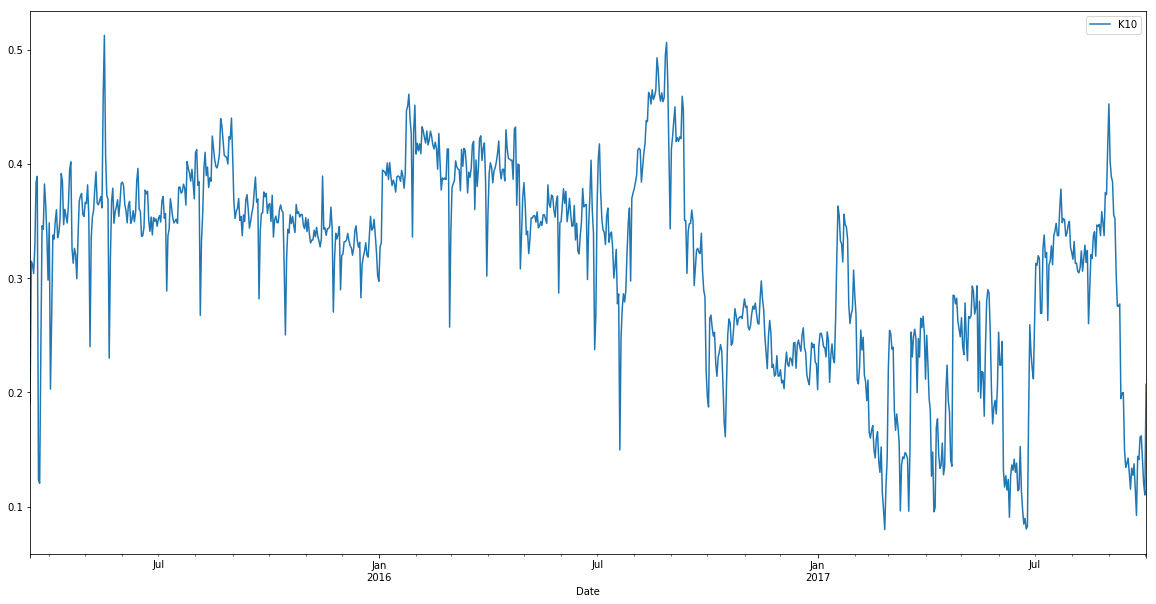

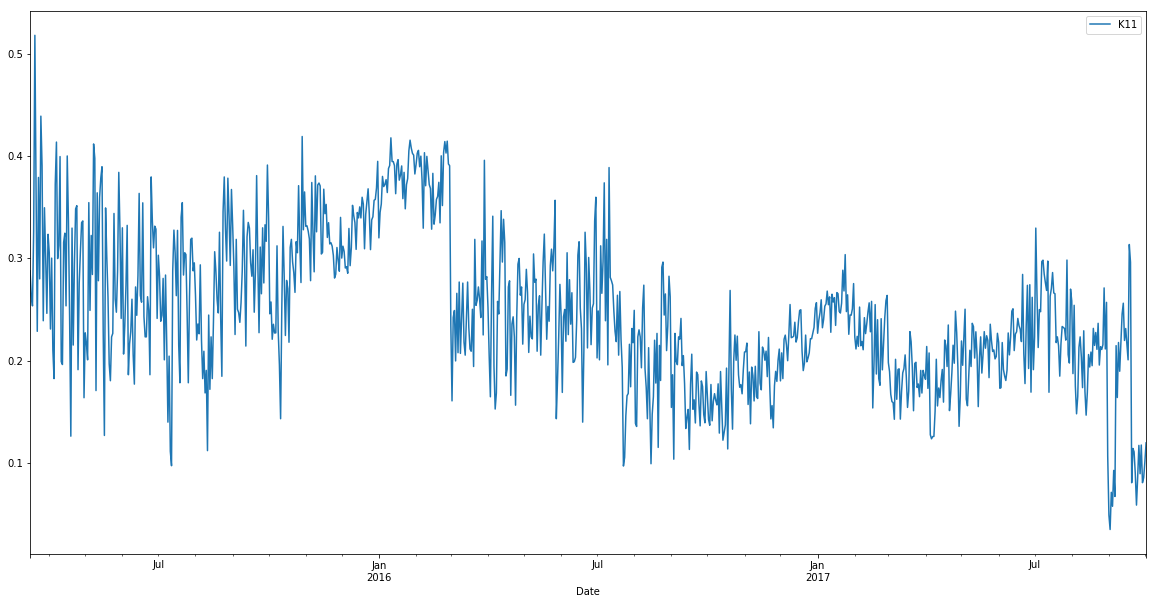

In [16]:
for k in Kcol:
    df_kpis_log.plot(x='Date', y=k, figsize=(20,10))

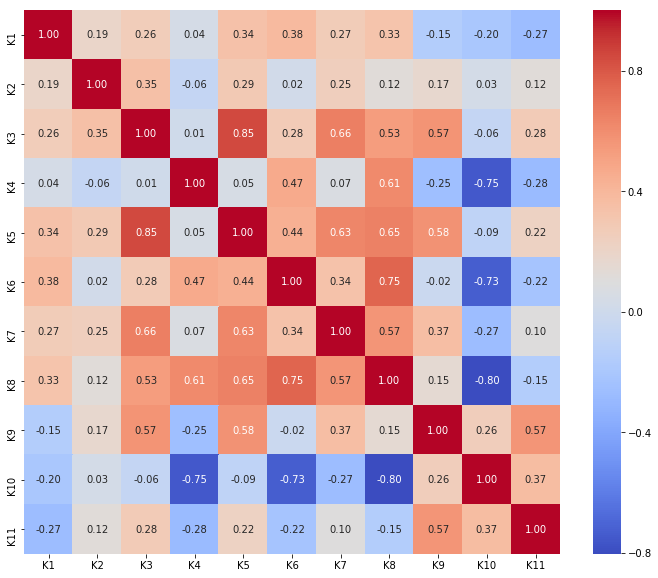

In [18]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,10))
g = sns.heatmap(df_kpis_log[Kcol].corr(), annot=True,
                fmt=".2f", cmap='coolwarm', ax=ax)

In [19]:
from statsmodels.graphics.tsaplots import acf, plot_acf
from statsmodels.graphics.tsaplots import pacf, plot_pacf
from pandas.tseries.plotting import tsplot

In [20]:
k_var = 'K11'
knat_acf = [df_kpis[k_var].autocorr(i) for i in range(1, 32)]
klog_acf = [df_kpis_log[k_var].autocorr(i) for i in range(1, 32)]

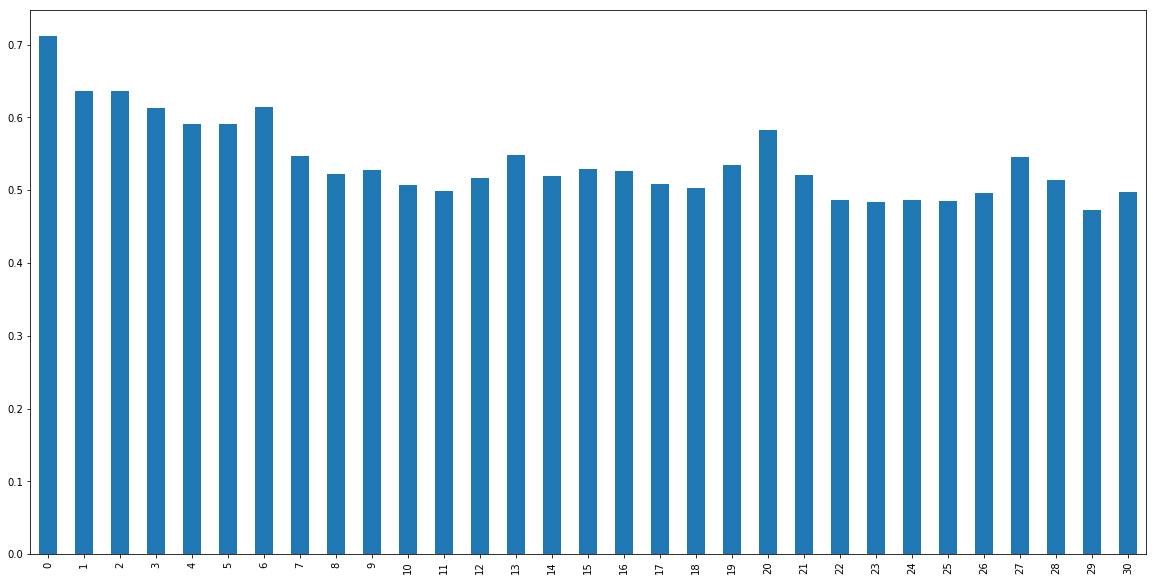

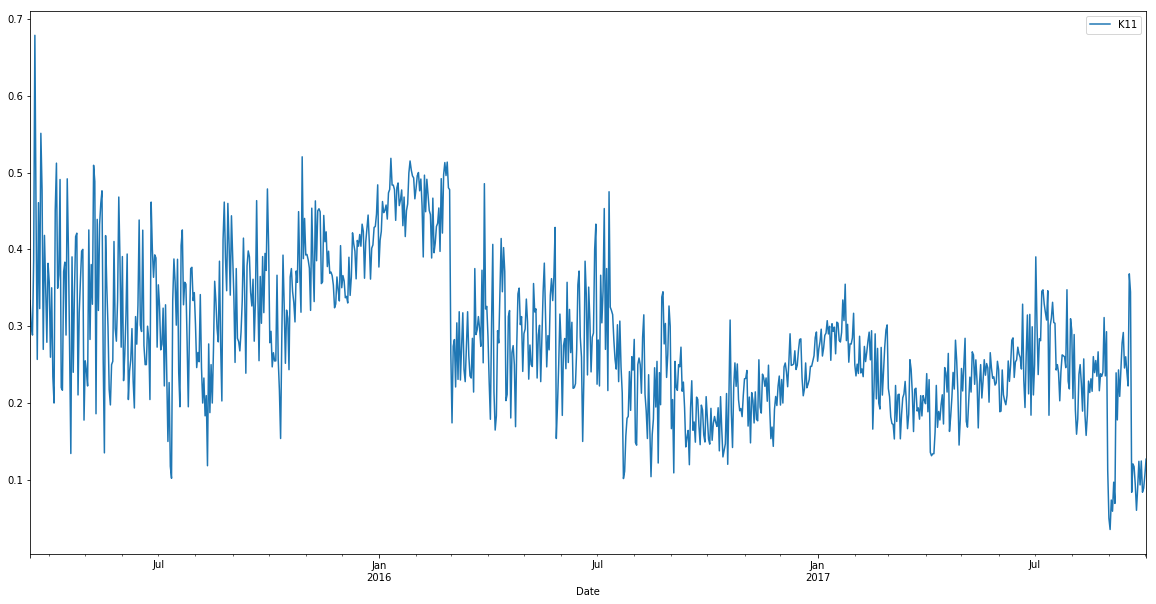

In [21]:
k_acf = pd.DataFrame([knat_acf, klog_acf]).T
k_acf.columns = [k_var, k_var + '_log']
k_acf[k_var].plot(kind='bar', figsize=(20,10))

df_kpis.plot(x='Date', y=k_var, figsize=(20,10))

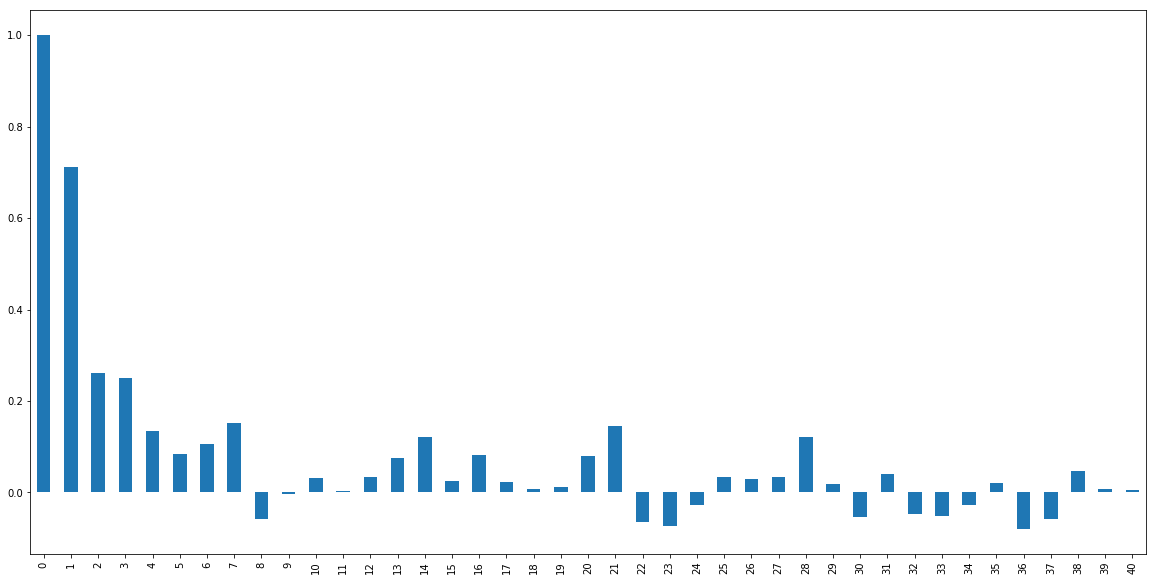

In [22]:
knat_pacf = pacf(df_kpis[k_var])
klog_pacf = pacf(df_kpis_log[k_var])
k_pacf = pd.DataFrame([knat_pacf, klog_pacf]).T
k_pacf.columns = [k_var, k_var + '_log']
k_pacf[k_var].plot(kind='bar', figsize=(20,10))

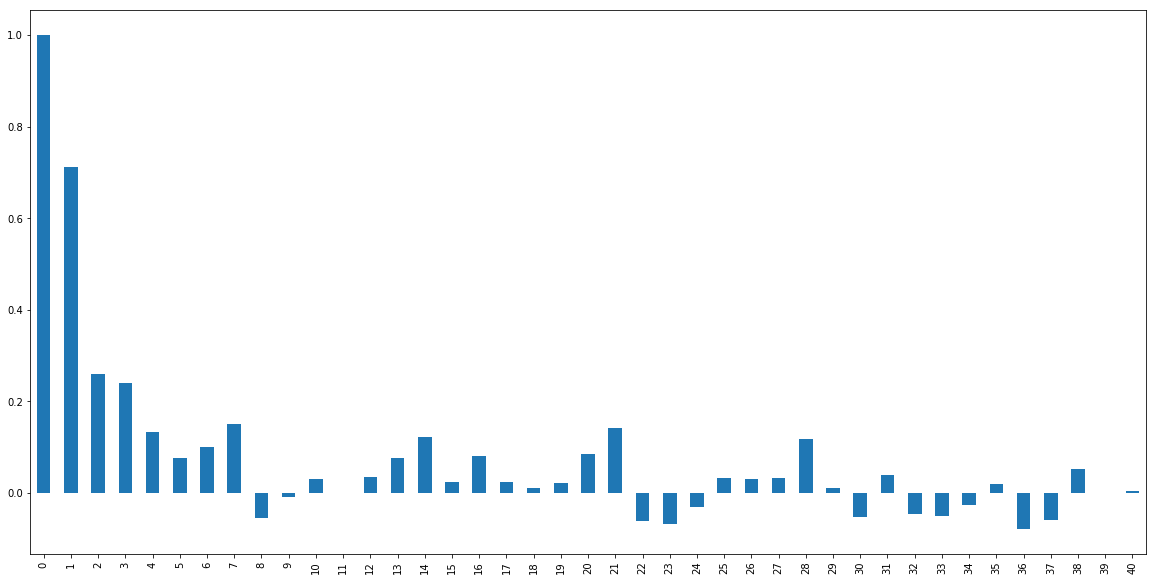

In [23]:
k_pacf[k_var + '_log'].plot(kind='bar', figsize=(20,10))

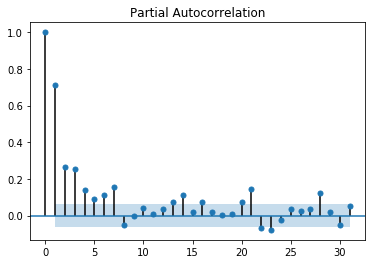

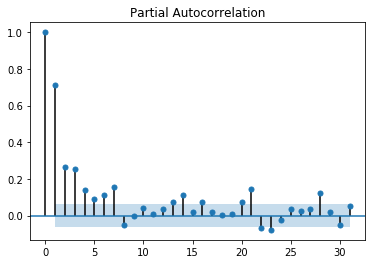

In [25]:
plot_pacf(df_kpis[k_var], method='ols', lags=31)

In [26]:
n = df_kpis.shape[0]
mylag = 7
k_last = df_kpis.loc[(mylag - 1):n, k_var]
k_first = df_kpis.loc[0:(n - mylag), k_var]
k_diff = k_last.reset_index() - k_first.reset_index()

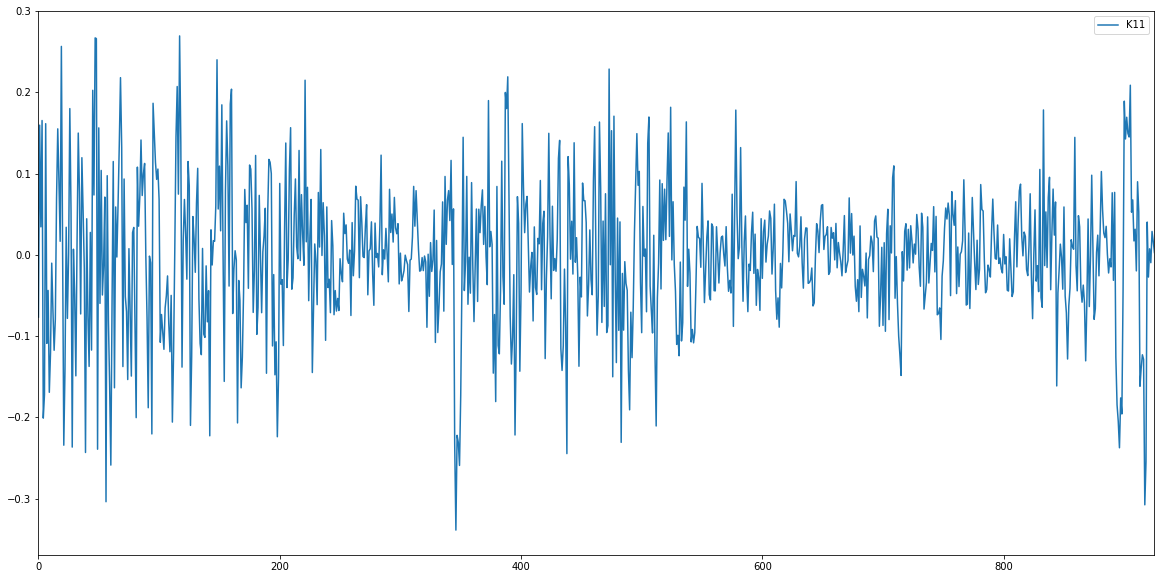

In [27]:
k_diff.drop('index', axis=1, inplace=True)
k_diff.plot(figsize=(20,10))

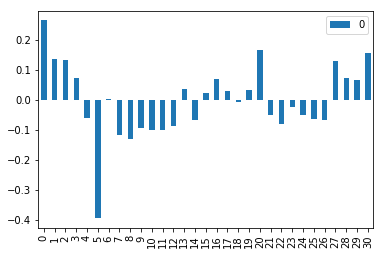

In [28]:
k_diff = pd.DataFrame(k_diff)
k_diff_acf = [k_diff[k_var].autocorr(i) for i in range(1, 32)]
k_diff_acf = pd.DataFrame(k_diff_acf)
k_diff_acf.plot(kind='bar')

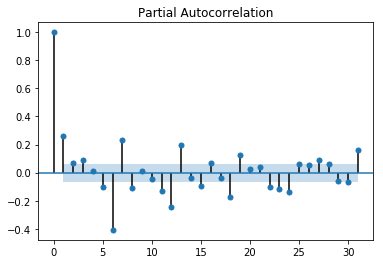

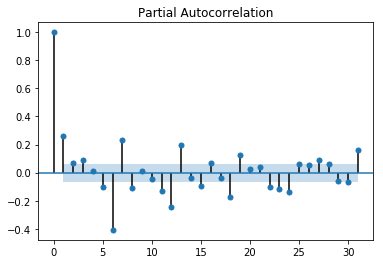

In [29]:
plot_pacf(k_diff[k_var], method='ols', lags=31)

In [47]:
df_kpis.columns

Index(['Date', 'K1', 'K2', 'K3', 'K4', 'K5', 'K6', 'K7', 'K8', 'K9', 'K10',
       'K11', 'month', 'year', 'weekday'],
      dtype='object')

In [50]:
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
pandas2ri.activate()

ro.r('library(forecast)')

rdf = pandas2ri.py2ri(df_kpis[k_var])
rdfx = pandas2ri.py2ri(df_kpis.drop(['K5', 'Date', 'K11', 'month', 'year', 'weekday'], axis=1))
rdfx2 = pandas2ri.py2ri(df_kpis['K10'])
ro.globalenv['r_timeseries'] = rdf
ro.globalenv['rdfx'] = rdfx2
# pred = ro.r('as.data.frame(forecast(auto.arima(r_timeseries, xreg=rdfx),h=5))')
aarima = ro.r('auto.arima(r_timeseries, xreg=rdfx)')

for i in range(18):
    print(aarima[i])

        ar1         ma1        xreg 
 0.24603975 -0.86282573 -0.08301035 

[1] 0.00377065

               ar1           ma1          xreg
ar1   0.0020538615 -0.0008927284  0.0001498389
ma1  -0.0008927284  0.0007833944 -0.0003315786
xreg  0.0001498389 -0.0003315786  0.0021187104

[1] TRUE TRUE TRUE

[1] 1277.722

[1] -2547.444

[1] 1 1 0 0 1 1 0

Time Series:
Start = 1 
End = 932 
Frequency = 1 
  [1]  3.507805e-04 -1.588001e-02 -1.813586e-02  8.024207e-02  3.233054e-01
  [6] -3.422878e-02 -1.533784e-01  8.979389e-02 -1.038403e-01  1.838282e-01
 [11]  3.661353e-02 -1.609013e-01  6.584564e-02 -4.935317e-02 -1.014399e-01
 [16]  2.948785e-02 -1.765211e-02 -1.239686e-01  1.795128e-02 -1.157732e-01
 [21] -1.081789e-01  1.680089e-01  1.451357e-01 -5.582313e-02  1.037378e-02
 [26]  1.301683e-01 -1.846426e-01 -9.806670e-02  6.624239e-02  3.424915e-02
 [31] -6.944089e-02  1.661977e-01  3.611329e-03 -9.983032e-02 -1.913434e-01
 [36]  1.151593e-01 -1.130408e-01  4.412998e-02  8.557654e-02  5.78263

Min: 0.0354330708661
Max: 0.678571428571
Mean: 0.28455077839
Variance: 0.00926131511127
Skewness 0.456421096184
Kurtosis: -0.108238047779


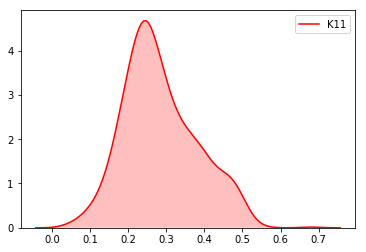

In [53]:
import seaborn as sns
g = sns.kdeplot(df_kpis[k_var], color="Red", shade = True)
print("Min:", df_kpis[k_var].min())
print("Max:", df_kpis[k_var].max())
print("Mean:", df_kpis[k_var].mean())
print("Variance:", df_kpis[k_var].var())
print("Skewness", df_kpis[k_var].skew())
print("Kurtosis:", df_kpis[k_var].kurtosis())